In [44]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import zipfile, os, shutil
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
import random

In [45]:
def extract_zip(zip_path, extract_to='data'):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
extract_zip("Training.zip", "data/train")
extract_zip("validation.zip", "data/valid")
extract_zip("evaluation.zip", "data/eval")

In [46]:
img_height, img_width = 180, 180
batch_size = 32
class_names = ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food',
               'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']
calorie_dict = {
    'Bread': 265, 'Dairy product': 150, 'Dessert': 400, 'Egg': 155, 'Fried food': 312,
    'Meat': 250, 'Noodles-Pasta': 221, 'Rice': 130, 'Seafood': 206, 'Soup': 75, 'Vegetable-Fruit': 65
}

In [47]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "data/train", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "data/valid", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "data/eval", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 9866 files belonging to 11 classes.
Found 3430 files belonging to 11 classes.
Found 3347 files belonging to 11 classes.


In [48]:
model = models.Sequential([
    tf.keras.Input(shape=(img_height, img_width, 3)), 
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names)) 
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,395 (25.36 MB)

 Trainable params: 6,648,395 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
epochs = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 183s 518ms/step - accuracy: 0.2066 - loss: 2.3203 - val_accuracy: 0.3528 - val_loss: 1.9114
Epoch 2/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 162s 523ms/step - accuracy: 0.3705 - loss: 1.7993 - val_accuracy: 0.3656 - val_loss: 1.8473
Epoch 3/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 155s 502ms/step - accuracy: 0.4588 - loss: 1.5880 - val_accuracy: 0.4259 - val_loss: 1.6543
Epoch 4/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 174s 561ms/step - accuracy: 0.5529 - loss: 1.3155 - val_accuracy: 0.4589 - val_loss: 1.6095
Epoch 5/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 167s 542ms/step - accuracy: 0.6536 - loss: 1.0253 - val_accuracy: 0.4405 - val_loss: 1.7851
Epoch 6/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 176s 569ms/step - accuracy: 0.7714 - loss: 0.6842 - val_accuracy: 0.4207 - val_loss: 2.0896
Epoch 7/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 170s 551ms/step - accuracy: 0.8755 - loss: 0.3992 - val_accuracy: 0.4248 - val_loss: 2.3354
Epoch 8/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 172s 557ms/step - accuracy: 0.9377 -

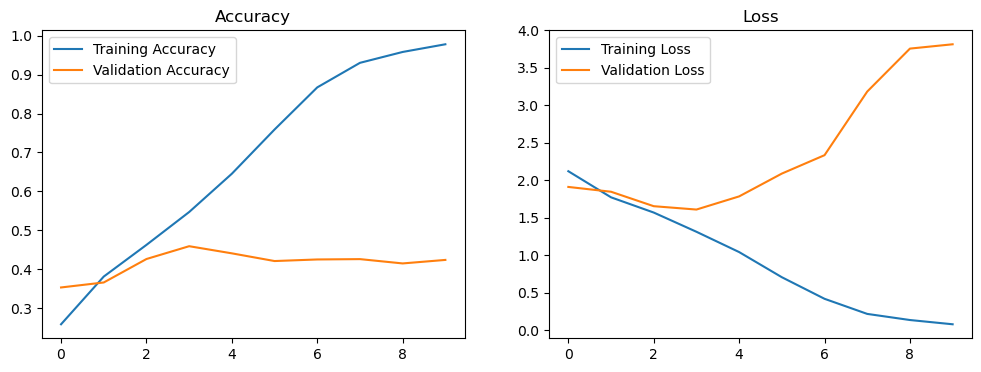

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [51]:
def predict_and_calories(img_path):
    try:
        img = load_img(img_path, target_size=(img_height, img_width))
        img_array = img_to_array(img)
        img_array_exp = tf.expand_dims(img_array, 0)

        predictions = model.predict(img_array_exp)
        predicted_class = class_names[np.argmax(predictions)]
        confidence = np.max(tf.nn.softmax(predictions))
        estimated_cal = calorie_dict[predicted_class]

        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{predicted_class} ({estimated_cal} kcal, {confidence*100:.2f}% confident)")
        plt.show()

        print(f"🍽️ Food Item: {predicted_class}")
        print(f"🔥 Estimated Calories: {estimated_cal} kcal")
        print(f"✅ Confidence: {confidence*100:.2f}%")

    except Exception as e:
        print("❌ Error:", e)

📷 Testing image: data/eval\Dessert\271.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


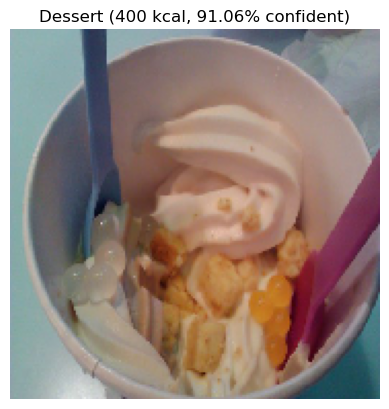

🍽️ Food Item: Dessert
🔥 Estimated Calories: 400 kcal
✅ Confidence: 91.06%


In [56]:
def random_eval_image():
    base = "data/eval"
    categories = os.listdir(base)
    random_cat = random.choice(categories)
    cat_path = os.path.join(base, random_cat)
    images = os.listdir(cat_path)
    if images:
        img_path = os.path.join(cat_path, random.choice(images))
        print(f"📷 Testing image: {img_path}")
        predict_and_calories(img_path)
    else:
        print("❌ No images found in category:", random_cat)

random_eval_image()